In [1]:
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('7500 Data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        7258 non-null   float64
 1   Sex                        7345 non-null   object 
 2   on_thyroxine               7500 non-null   object 
 3   query_on_thyroxine         7500 non-null   object 
 4   on_antithyroid_medication  7500 non-null   object 
 5   thyroid_surgery            7500 non-null   object 
 6   query_hypothyroid          7500 non-null   object 
 7   query_hyperthyroid         7500 non-null   object 
 8   pregnant                   7500 non-null   object 
 9   sick                       7500 non-null   object 
 10  tumor                      7500 non-null   object 
 11  lithium                    7500 non-null   object 
 12  goiter                     7500 non-null   object 
 13  TSH                        7315 non-null   float

In [5]:
df.head(10)

,Age,Sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goiter,TSH,T3,TT4,T4U,FTI,Classes
0,66.0,F,f,f,f,f,f,f,f,f,f,f,f,0.015,3.000,241.0,0.87,177.0,hyperthyroid
1,56.0,M,f,f,f,f,f,f,f,f,f,f,f,0.005,3.400,198.0,0.88,216.0,hyperthyroid
2,18.0,M,f,f,f,f,f,t,f,f,f,f,f,0.150,6.500,219.0,0.94,248.0,hyperthyroid
3,37.0,F,f,f,t,f,f,t,t,f,f,f,f,0.050,8.305,250.0,1.09,162.0,hyperthyroid
4,22.0,F,f,f,f,f,f,f,t,f,f,f,f,0.040,4.900,183.0,1.78,160.0,hyperthyroid
5,57.0,F,f,f,f,f,f,f,f,f,f,f,f,0.030,3.100,182.0,0.93,266.0,hyperthyroid
6,20.0,F,f,f,f,f,f,f,f,f,f,f,f,0.950,2.100,124.0,0.71,112.0,hyperthyroid
7,38.0,M,f,f,f,f,f,f,f,f,f,f,f,0.150,3.600,101.0,1.73,102.0,hyperthyroid
8,40.0,M,f,f,f,f,f,f,f,f,f,f,f,0.005,2.200,183.0,0.83,175.0,hyperthyroid
9,51.0,F,f,f,f,f,f,f,f,f,f,f,f,0.100,2.500,200.0,1.16,244.0,hyperthyroid


In [6]:
mask = df.isnull()
total = mask.sum()
percent = 100*mask.mean()

missing_data = pd.concat([total, percent], axis=1,join='outer',
                         keys=['count_missing', 'perc_missing'])
missing_data.sort_values(by='perc_missing', ascending=False, inplace=True)
missing_data

,count_missing,perc_missing
T3,386,5.146667
Age,242,3.226667
TSH,185,2.466667
Sex,155,2.066667
T4U,26,0.346667
FTI,10,0.133333
tumor,0,0.000000
TT4,0,0.000000
goiter,0,0.000000
lithium,0,0.000000


<AxesSubplot:>

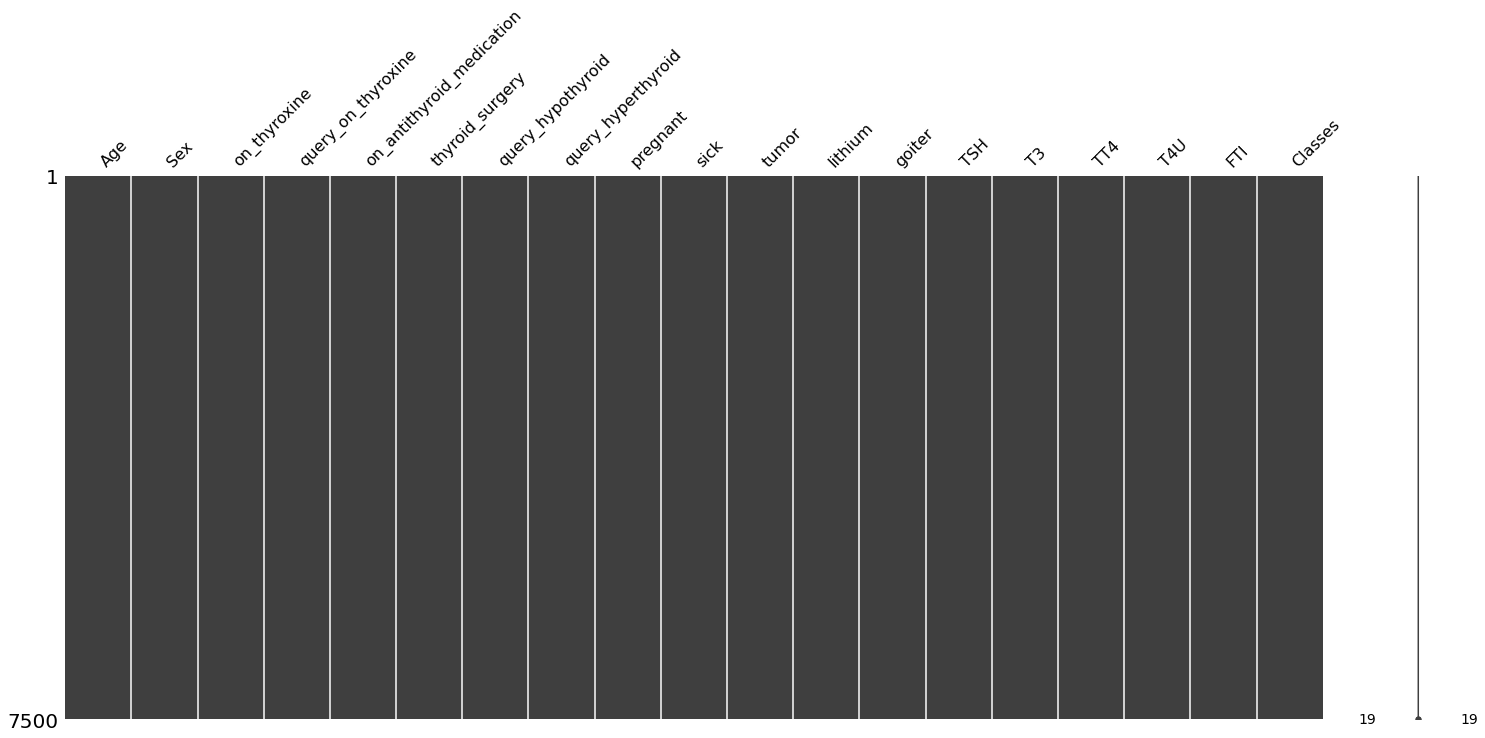

In [14]:
msno.matrix(df)

In [9]:
df.shape

(7500, 19)

In [10]:
df['Age'] = df['Age'].fillna('NA')
df['Sex'] = df['Sex'].fillna('NA')
df

,Age,Sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goiter,TSH,T3,TT4,T4U,FTI,Classes
0,66.0,F,f,f,f,f,f,f,f,f,f,f,f,0.015,3.000,241.0,0.87,177.0,hyperthyroid
1,56.0,M,f,f,f,f,f,f,f,f,f,f,f,0.005,3.400,198.0,0.88,216.0,hyperthyroid
2,18.0,M,f,f,f,f,f,t,f,f,f,f,f,0.150,6.500,219.0,0.94,248.0,hyperthyroid
3,37.0,F,f,f,t,f,f,t,t,f,f,f,f,0.050,8.305,250.0,1.09,162.0,hyperthyroid
4,22.0,F,f,f,f,f,f,f,t,f,f,f,f,0.040,4.900,183.0,1.78,160.0,hyperthyroid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,69.0,F,f,f,f,f,f,f,f,f,f,f,f,0.300,0.600,113.0,0.95,111.0,negative
7496,60.0,M,f,f,f,f,f,f,f,f,f,f,f,3.400,1.700,85.0,0.91,92.0,negative
7497,75.0,M,f,f,f,f,f,f,f,f,f,f,f,13.000,1.500,61.0,0.87,62.0,negative
7498,26.0,M,f,f,f,f,f,f,f,f,f,f,f,1.200,1.800,105.0,1.22,82.0,negative


# Use LabelEncoder for object types

In [8]:
from sklearn.preprocessing import LabelEncoder
# creating initial dataframe
sex_class = ('M','F','NA')
sex_df = pd.DataFrame(sex_class, columns=['Sex_Class'])

thyroxine_class = ('t','f')
thyroxine_df = pd.DataFrame(thyroxine_class, columns=['Thyroxine_Class'])

query_thyroxine_class = ('t','f')
query_thyroxine_df = pd.DataFrame(query_thyroxine_class, columns=['Query_Thyroxine_Class'])

antithyroid_class = ('t','f')
antithyroid_df = pd.DataFrame(antithyroid_class, columns=['Antithyroid_Class'])

sick_class = ('t','f')
sick_df = pd.DataFrame(sick_class, columns=['Sick_Class'])

pregnant_class = ('t','f')
pregnant_df = pd.DataFrame(pregnant_class, columns=['Pregnant_Class'])

thyroid_surg_class = ('t','f')
thyroid_surg_df = pd.DataFrame(thyroid_surg_class, columns=['Thyroid_Surg_Class'])

query_hypo_class = ('t','f')
query_hypo_df = pd.DataFrame(query_hypo_class, columns=['Hypo_Class'])

query_hyper_class = ('t','f')
query_hyper_df = pd.DataFrame(query_hyper_class, columns=['Hyper_Class'])

lithium_class = ('t','f')
lithium_df = pd.DataFrame(lithium_class, columns=['Lithium_Class'])

goiter_class = ('t','f')
goiter_df = pd.DataFrame(goiter_class, columns=['Goiter_Class'])

tumor_class = ('t','f')
tumor_df = pd.DataFrame(tumor_class, columns=['Tumor_Class'])

classes_class = ('negative','hyperthyroid', 'hypothyroid')
classes_df = pd.DataFrame(classes_class, columns=['Classes_Class'])

# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df['Sex_num'] = labelencoder.fit_transform(df['Sex'])
df['Thyroxine_num'] = labelencoder.fit_transform(df['on_thyroxine'])
df['Query_Thyroxine_num'] = labelencoder.fit_transform(df['query_on_thyroxine'])
df['Antithyroid_num'] = labelencoder.fit_transform(df['on_antithyroid_medication'])
df['Sick_num'] = labelencoder.fit_transform(df['sick'])
df['Pregnant_num'] = labelencoder.fit_transform(df['pregnant'])
df['Thyroid_Surg_num'] = labelencoder.fit_transform(df['thyroid_surgery'])
df['Query_Hypo_num'] = labelencoder.fit_transform(df['query_hypothyroid'])
df['Query_Hyper_num'] = labelencoder.fit_transform(df['query_hyperthyroid'])
df['Lithium_num'] = labelencoder.fit_transform(df['lithium'])
df['Goiter_num'] = labelencoder.fit_transform(df['goiter'])
df['Tumor_num'] = labelencoder.fit_transform(df['tumor'])
df['Classes_num'] = labelencoder.fit_transform(df['Classes'])
df

,Age,Sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,...,Antithyroid_num,Sick_num,Pregnant_num,Thyroid_Surg_num,Query_Hypo_num,Query_Hyper_num,Lithium_num,Goiter_num,Tumor_num,Classes_num
0,37.0,F,f,f,f,f,f,f,f,f,...,0,0,0,0,0,0,0,0,0,0
1,60.0,M,f,f,f,f,f,f,f,f,...,0,0,0,0,0,0,0,0,0,0
2,54.0,F,f,f,f,f,f,f,f,f,...,0,0,0,0,0,0,0,0,0,0
3,22.0,F,f,f,f,f,f,f,f,f,...,0,0,0,0,0,0,0,0,0,0
4,31.0,F,f,f,f,f,f,f,f,f,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,69.0,F,f,f,f,f,f,f,f,f,...,0,0,0,0,0,0,0,0,0,2
1496,60.0,M,f,f,f,f,f,f,f,f,...,0,0,0,0,0,0,0,0,0,2
1497,75.0,M,f,f,f,f,f,f,f,f,...,0,0,0,0,0,0,0,0,0,2
1498,26.0,M,f,f,f,f,f,f,f,f,...,0,0,0,0,0,0,0,0,0,2


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        7500 non-null   object 
 1   Sex                        7500 non-null   object 
 2   on_thyroxine               7500 non-null   object 
 3   query_on_thyroxine         7500 non-null   object 
 4   on_antithyroid_medication  7500 non-null   object 
 5   thyroid_surgery            7500 non-null   object 
 6   query_hypothyroid          7500 non-null   object 
 7   query_hyperthyroid         7500 non-null   object 
 8   pregnant                   7500 non-null   object 
 9   sick                       7500 non-null   object 
 10  tumor                      7500 non-null   object 
 11  lithium                    7500 non-null   object 
 12  goiter                     7500 non-null   object 
 13  TSH                        7500 non-null   float

# Convert to csv file

In [15]:
df.to_csv('FinalData.csv')

**Labels for dataset**

Female = 0

Male = 1

NA = 2

f = 0

t = 1

hyperthyroid = 0

hypothyroid = 1

negative = 2

# Null value to 0


In [10]:
df = pd.read_csv('FinalValidation.csv')

In [12]:
df.fillna(0, inplace=True)

In [12]:
df.to_csv('FinalValidation.csv')